## Feature 1 - Read data in from a local csv file - FETCH EXPENSE AND REWARDS SUMMARY

#### Use pandas library to read a csv file. Import pandas and numpy libraries for data analysis. Import matplotlib for data visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
monthly_budget = 900
df = pd.read_csv (r'FETCH EXPENSE AND REWARDS SUMMARY.csv') #read.csv file stored in FetchExpenseAndRewards project folder
# Get the number of rows and columns
rows = len(df.axes[0])
cols = len(df.axes[1])
  
# Print the number of rows and columns
print(f'Number of rows and columns: {str(rows)} and {str(cols)}')
print(df.head(5)) #print top 5 rows
print(df.tail(5)) #print bottom 5 rows

Number of rows and columns: 97 and 8
  TRANSACTION_DATE     STORE_NAME     CATEGORY  NUMBER_OF_ITEMS  \
0       01/15/2022  REMKE MARKETS      GROCERY                9   
1          1/15/22            CVS      GROCERY                2   
2       01/16/2022     APPLEBEE’S  RESTAURANTS                9   
3       01/18/2022            CVS      GROCERY                1   
4       01/25/2022         COSTCO      GROCERY               41   

   TOTAL_AMOUNT_SPENT($)  FETCH_REWARDS_EARNED SPECIAL_OFFER_BONUS(Y/N)  \
0                  30.19                    25                        N   
1                  22.87                    25                        N   
2                  72.98                    25                        N   
3                  10.91                    25                        N   
4                 501.94                   214                        Y   

  EXCEPTION  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
   TRANSACTION_DATE      

#### Checking the data types.

In [2]:
index = [list(df.columns)]   
print(index)
print(df.dtypes)
print(type(df))


[['TRANSACTION_DATE', 'STORE_NAME', 'CATEGORY', 'NUMBER_OF_ITEMS', 'TOTAL_AMOUNT_SPENT($)', 'FETCH_REWARDS_EARNED', 'SPECIAL_OFFER_BONUS(Y/N)', 'EXCEPTION']]
TRANSACTION_DATE             object
STORE_NAME                   object
CATEGORY                     object
NUMBER_OF_ITEMS               int64
TOTAL_AMOUNT_SPENT($)       float64
FETCH_REWARDS_EARNED          int64
SPECIAL_OFFER_BONUS(Y/N)     object
EXCEPTION                    object
dtype: object
<class 'pandas.core.frame.DataFrame'>


## Feature 2 - Manipulate and clean data

#### Notice the datatype for transaction date says object, next change it to datetime 64, so all data types are uniform. 

In [3]:
# formatting to correct datetime
df['TRANSACTION_DATE'] = pd.to_datetime(df['TRANSACTION_DATE']) 
print(df.dtypes)
print(df.head(5)) #print top 5 rows

TRANSACTION_DATE            datetime64[ns]
STORE_NAME                          object
CATEGORY                            object
NUMBER_OF_ITEMS                      int64
TOTAL_AMOUNT_SPENT($)              float64
FETCH_REWARDS_EARNED                 int64
SPECIAL_OFFER_BONUS(Y/N)            object
EXCEPTION                           object
dtype: object
  TRANSACTION_DATE     STORE_NAME     CATEGORY  NUMBER_OF_ITEMS  \
0       2022-01-15  REMKE MARKETS      GROCERY                9   
1       2022-01-15            CVS      GROCERY                2   
2       2022-01-16     APPLEBEE’S  RESTAURANTS                9   
3       2022-01-18            CVS      GROCERY                1   
4       2022-01-25         COSTCO      GROCERY               41   

   TOTAL_AMOUNT_SPENT($)  FETCH_REWARDS_EARNED SPECIAL_OFFER_BONUS(Y/N)  \
0                  30.19                    25                        N   
1                  22.87                    25                        N   
2             

#### To clean the data and remove unnecessary information, use .loc function to locate and remove and replace the values. 

In [4]:
#removing rows where fetch rewards=0 and replacing it with new dataframe
for rewards in df.index:
    if df.loc[rewards, 'FETCH_REWARDS_EARNED'] == 0: #remove rows where fetch rewards earned =0
        df.drop(rewards, inplace = True) #replace with new data 
        
#replacing one of the value in category from expenses to medical expenses     
#expenses was a typo,meant to be medical expenses, thus replaced it with .loc() function
df.loc[df['CATEGORY'] == 'EXPENSES', 'CATEGORY'] = 'MEDICAL EXPENSES'   

rows = len(df.axes[0]) #Using len() function to get no. of rows
cols = len(df.axes[1]) #Using len() function to get no. of columns
  
# Print the number of rows and columns
print(f'Number of rows and columns: {str(rows)} and {str(cols)}')
print(df.head(5))

Number of rows and columns: 89 and 8
  TRANSACTION_DATE     STORE_NAME     CATEGORY  NUMBER_OF_ITEMS  \
0       2022-01-15  REMKE MARKETS      GROCERY                9   
1       2022-01-15            CVS      GROCERY                2   
2       2022-01-16     APPLEBEE’S  RESTAURANTS                9   
3       2022-01-18            CVS      GROCERY                1   
4       2022-01-25         COSTCO      GROCERY               41   

   TOTAL_AMOUNT_SPENT($)  FETCH_REWARDS_EARNED SPECIAL_OFFER_BONUS(Y/N)  \
0                  30.19                    25                        N   
1                  22.87                    25                        N   
2                  72.98                    25                        N   
3                  10.91                    25                        N   
4                 501.94                   214                        Y   

  EXCEPTION  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


### Feature 3 - Analyze data - FETCH EXPENSE AND REWARDS SUMMARY

Analyze data from January 2022 to September 2022 to see no. of items purchased, how much money is spent so far, what is the maximum and minimum, average cost of an item and average per transaction. 
Round the average to 2 decimal point. 

In [5]:
#Analyzing the expenses
total_number_of_items_purchased = df['NUMBER_OF_ITEMS'].sum()
total_amount_spent = df['TOTAL_AMOUNT_SPENT($)'].sum()
maximum_amt_spent = df['TOTAL_AMOUNT_SPENT($)'].max()
minimum_amt_spent = df['TOTAL_AMOUNT_SPENT($)'].min()
average_amt_spent = round(df['TOTAL_AMOUNT_SPENT($)'].mean(), 2)
number_of_trans = df['TRANSACTION_DATE'].count()
average_cost_of_each_item = round(total_amount_spent / total_number_of_items_purchased, 2)
average_cost_per_transaction = round(total_amount_spent / number_of_trans, 2)

print('Analysis of expenses Jan-Sept 2022')
print(f'Total number of items purchased : {total_number_of_items_purchased}')
print(f'Total amount spent : $ {total_amount_spent}')
print(f'Maximum amount spent : ${maximum_amt_spent}')
print(f'Minimum amount spent : ${minimum_amt_spent}')
print(f'Average amount spent : ${average_amt_spent}')
print(f'Total number of transaction : {number_of_trans}')
print(f'Average cost of each item : ${average_cost_of_each_item}')
print(f'Average cost per transaction : ${average_cost_per_transaction}')



Analysis of expenses Jan-Sept 2022
Total number of items purchased : 815
Total amount spent : $ 6508.27
Maximum amount spent : $501.94
Minimum amount spent : $0.31
Average amount spent : $73.13
Total number of transaction : 89
Average cost of each item : $7.99
Average cost per transaction : $73.13


#### Analyze data from January 2022 to September 2022 to see how much rewards is earned so far, what is the maximum and minimum, average rewards earned. Round the average to 2 decimal point. 

In [10]:
#Analysing rewards
total_rewards_earned = df['FETCH_REWARDS_EARNED'].sum()
maximum_rewards_earned = df['FETCH_REWARDS_EARNED'].max()
minimum_rewards_earned = df['FETCH_REWARDS_EARNED'].min()
average_rewards_earned = round(df['FETCH_REWARDS_EARNED'].mean(), 2)

print('Analysis of rewards Jan-Sept 2022')
print(f'Total amount spent : $ {total_rewards_earned}')
print(f'Maximum amount spent : ${maximum_rewards_earned}')
print(f'Minimum amount spent : ${minimum_rewards_earned}')
print(f'Average amount spent : ${average_rewards_earned}')


Analysis of rewards Jan-Sept 2022
Total amount spent : $ 6189
Maximum amount spent : $874
Minimum amount spent : $25
Average amount spent : $69.54


## Feature 3, 4 & 5 - More Data Analysis, Visualization(using Matplotlib) and Interpretation of data

### How much money is spent and rewards earned each month?

Using pandas groupby function to group all the transaction by month and print total amount spent that month and see how many total rewards points earned.
#### Plot the information in a line graph

                  TOTAL_AMOUNT_SPENT($)  FETCH_REWARDS_EARNED
TRANSACTION_DATE                                             
1                                819.93                   427
2                                639.11                   444
3                                492.14                   350
4                                858.99                  1255
5                                172.98                   150
6                                770.58                  1734
7                                362.64                   317
8                               1310.65                   801
9                               1081.25                   711


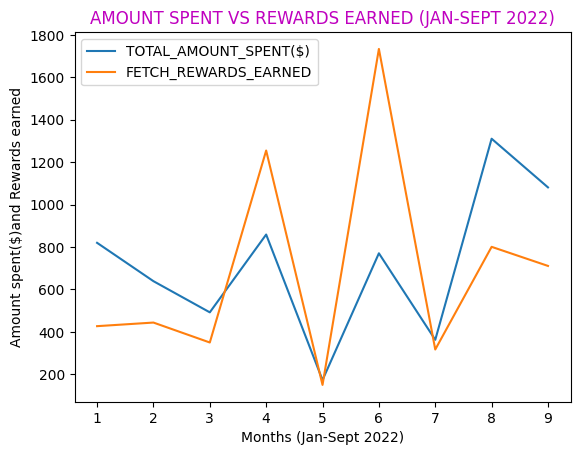

In [11]:
#grouping by month to get total expenses n rewards
monthly_expense_rewards = df.groupby(df.TRANSACTION_DATE.dt.month)[['TOTAL_AMOUNT_SPENT($)', 'FETCH_REWARDS_EARNED']].sum()
print(monthly_expense_rewards)
#plotting the data to see how much rewards is earned vs the amount spent
plt.plot(monthly_expense_rewards)
plt.xlabel('Months (Jan-Sept 2022)')
plt.ylabel('Amount spent($)and Rewards earned')
plt.title('AMOUNT SPENT VS REWARDS EARNED (JAN-SEPT 2022)', c='m')
plt.legend(monthly_expense_rewards)


Above graph tells us that the total spend doesnot always correlates to rewards earned. Highest amount spent was in August vs highest rewards earned was in June.

#### Alternate way to look and visualize data. 

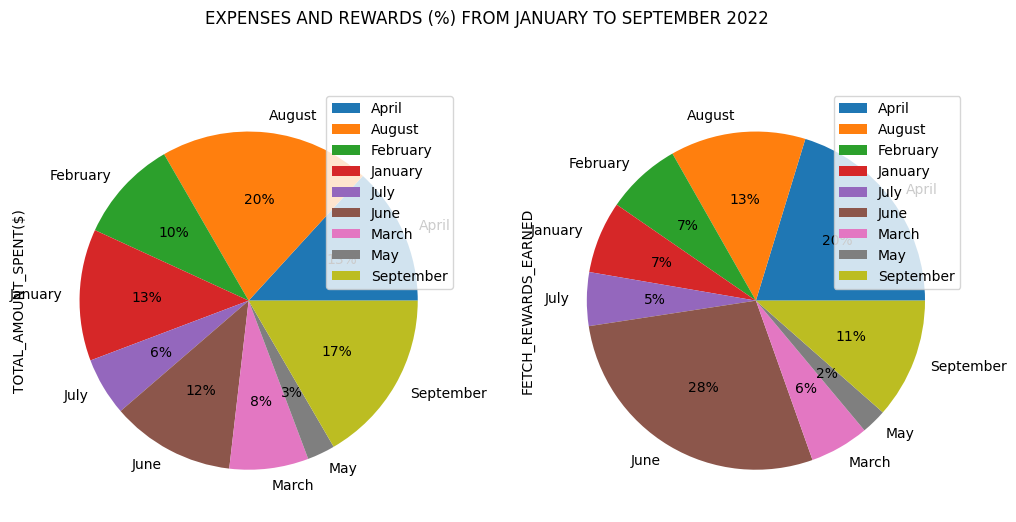

In [12]:
#grouping by month to get total spent n rewards
monthly_expense_rewards = df.groupby(df.TRANSACTION_DATE.dt.strftime('%B'))[['TOTAL_AMOUNT_SPENT($)', 'FETCH_REWARDS_EARNED']].sum().plot.pie(figsize=(12, 6), 
                          subplots=True, autopct ='%1.0f%%' , title='EXPENSES AND REWARDS (%) FROM JANUARY TO SEPTEMBER 2022',
                        label=['TOTAL_AMOUNT_SPENT($)', 'FETCH_REWARDS_EARNED'])


Above visualization shows that 20% of the expenses was made in August, while only 3% was made in May.
28% of the rewards was eaned in June while only 2% was earned in May.

### Which month is under or over budget of 900?

In [18]:
#put the transaction date in monthly order
df['MONTHS'] = df['TRANSACTION_DATE'].dt.strftime('%B')

#group the trasactions by month and sum the total amount spent
monthly_expense = df.groupby('MONTHS', as_index=False)['TOTAL_AMOUNT_SPENT($)'].sum()
#print(monthly_expense)
print('THESE MONTHS EXCEED THE MONTHLY BUDGET OF $900')

# using .loc() function to see if the total spent is over the budget and print
monthly_expense.loc[monthly_expense['TOTAL_AMOUNT_SPENT($)'] > monthly_budget]



THESE MONTHS EXCEED THE MONTHLY BUDGET OF $900


,MONTHS,TOTAL_AMOUNT_SPENT($)
1,August,1310.65
8,September,1081.25


In [22]:
# using .loc() function to see if the total spent is under the budget and print
print('THESE MONTHS ARE UNDER THE MONTHLY BUDGET OF $900')
monthly_expense.loc[monthly_expense['TOTAL_AMOUNT_SPENT($)'] <= monthly_budget]



THESE MONTHS ARE UNDER THE MONTHLY BUDGET OF $900


,MONTHS,TOTAL_AMOUNT_SPENT($)
0,April,858.99
2,February,639.11
3,January,819.93
4,July,362.64
5,June,770.58
6,March,492.14
7,May,172.98


### How much was spent on each category from Jan-Sept 2022?

TOTAL EXPENSES BY CATEGORY FROM JANUARY TO SEPTEMBER 2022
                  TOTAL_AMOUNT_SPENT($)
CATEGORY                               
GAS                              369.96
GROCERY                         5055.29
HOME IMPROVEMENT                 169.09
MEDICAL EXPENSES                  50.00
MISCELLANEOUS                      6.49
RESTAURANTS                      444.67
SHOPPING                         412.77


<AxesSubplot: title={'center': 'TOTAL EXPENSES BY CATEGORY FROM JANUARY TO SEPTEMBER 2022'}, ylabel='TOTAL_AMOUNT_SPENT($)'>

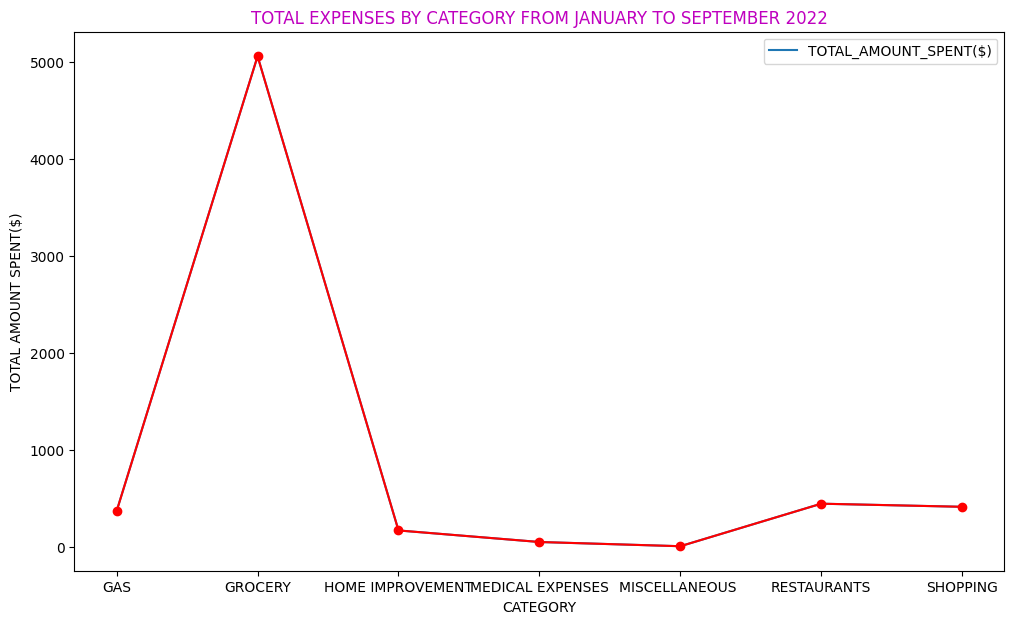

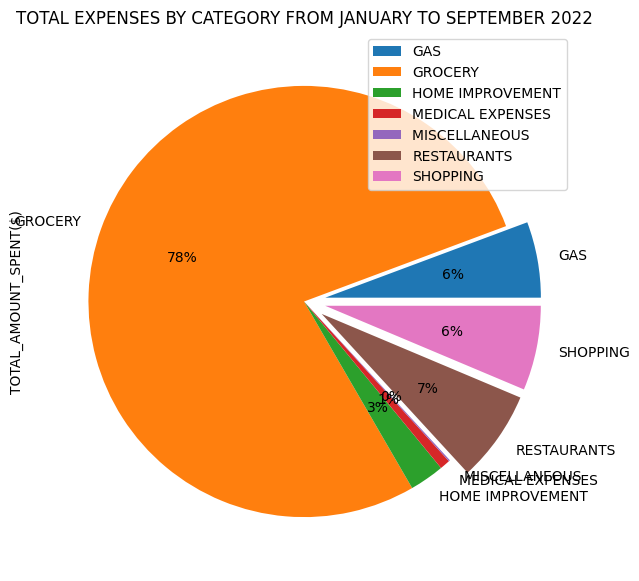

In [25]:
#calculating the total amount spent by categories using groupby 
expense_by_category = df.groupby('CATEGORY')[['TOTAL_AMOUNT_SPENT($)']].sum()
#creating explode data
explode = (0.1, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1)
print('TOTAL EXPENSES BY CATEGORY FROM JANUARY TO SEPTEMBER 2022')
print(expense_by_category)

#plotting line graph
expense_by_category.plot(figsize=(12,7), kind='line', )
plt.plot(expense_by_category, 'o-r')
plt.ylabel('TOTAL AMOUNT SPENT($)')
plt.title('TOTAL EXPENSES BY CATEGORY FROM JANUARY TO SEPTEMBER 2022', c='m')

#plotting a pie chart
expense_by_category.plot(figsize=(10, 7), kind='pie', y='TOTAL_AMOUNT_SPENT($)', 
                         title='TOTAL EXPENSES BY CATEGORY FROM JANUARY TO SEPTEMBER 2022', 
                         autopct='%1.0f%%', explode=explode)


The graph shows that significant amount (78%) of the money was spent on grocery. 

### How much is spent on each category each month?

                                   TOTAL_AMOUNT_SPENT($)
TRANSACTION_DATE CATEGORY                               
1                GAS                               49.58
                 GROCERY                          697.37
                 RESTAURANTS                       72.98
2                GAS                               74.70
                 GROCERY                          500.38
                 RESTAURANTS                       64.03
3                GAS                               69.82
                 GROCERY                          302.22
                 MEDICAL EXPENSES                  50.00
                 RESTAURANTS                       25.27
                 SHOPPING                          44.83
4                GAS                               62.55
                 GROCERY                          637.74
                 HOME IMPROVEMENT                  48.40
                 RESTAURANTS                      110.30
5                GROCERY       

<AxesSubplot: title={'center': 'MONTHLY EXPENSES BY CATEGORY'}, xlabel='Months (Jan-Sept 2022)', ylabel='Amount spent($)'>

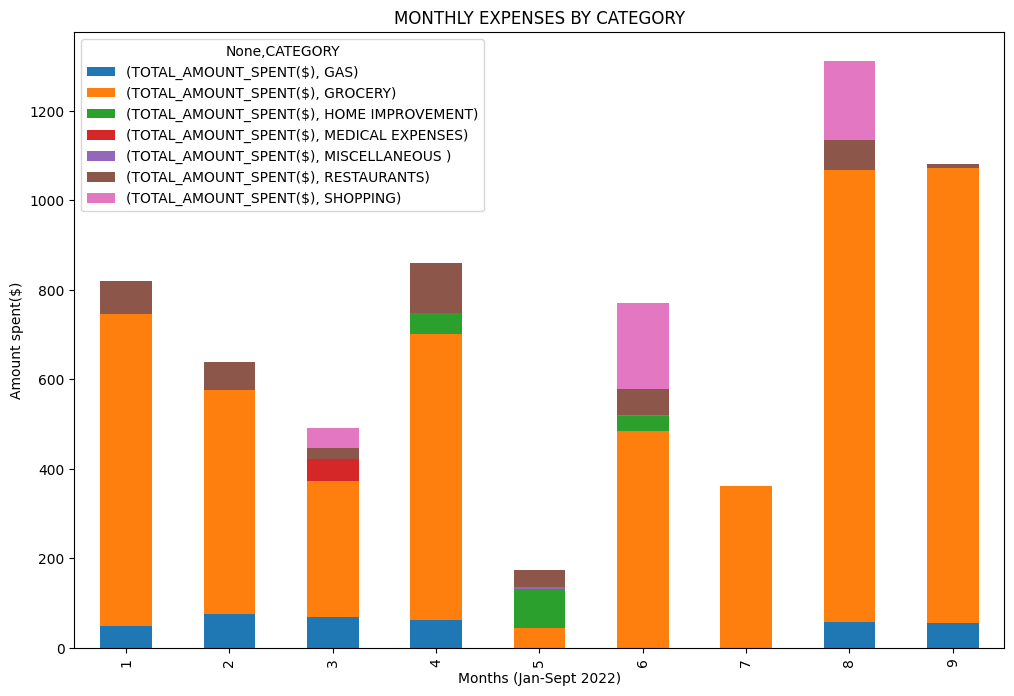

In [111]:

#Calculating how much is spent on each category every month

monthly_expense = df.groupby([(df.TRANSACTION_DATE.dt.month), 'CATEGORY'])[['TOTAL_AMOUNT_SPENT($)']].sum()
print(monthly_expense)

#plotting a stacked bar graph
monthly_expense.unstack().plot(kind='bar', stacked=True, figsize=(12, 8),
                     xlabel='Months (Jan-Sept 2022)', ylabel= 'Amount spent($)', 
                               title='MONTHLY EXPENSES BY CATEGORY')

Each bar shows the amount of money spent($), each for the month of January thru September. The bar is color coded that represents each category.

### 



AxesSubplot(0.125,0.11;0.775x0.77)


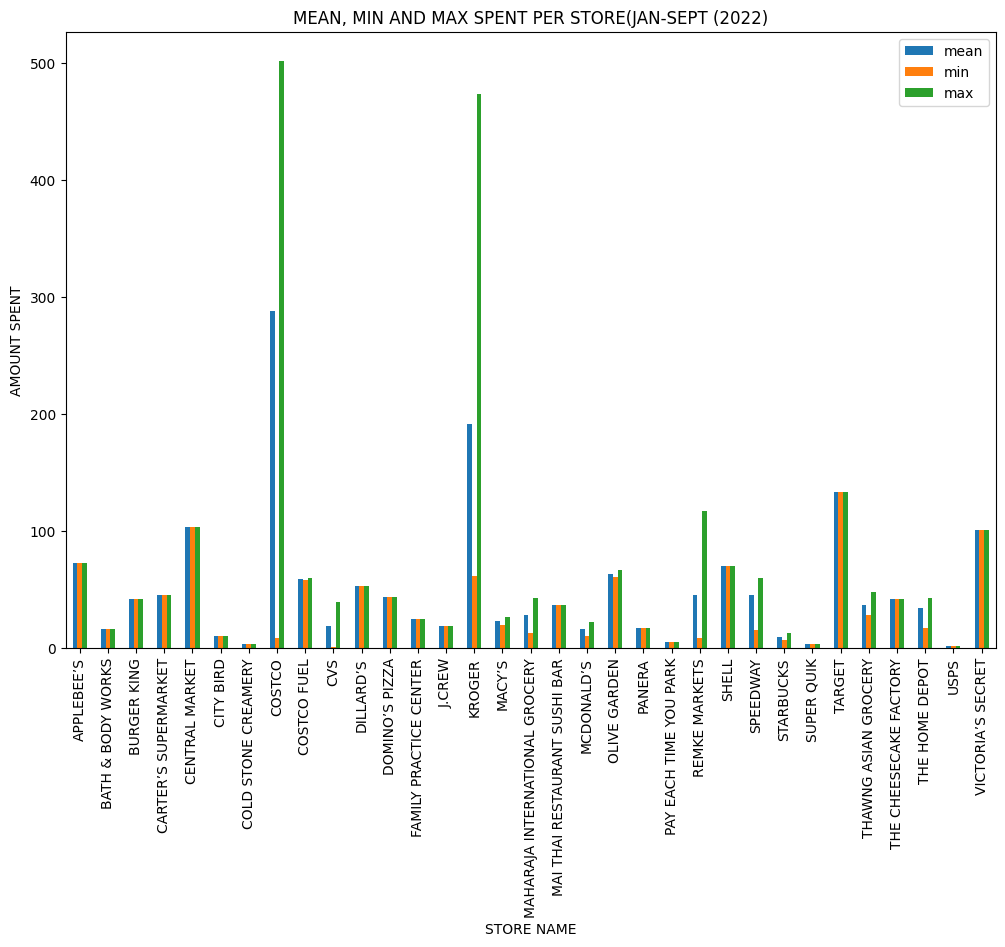

In [10]:
total_by_store = df.groupby('STORE_NAME')['TOTAL_AMOUNT_SPENT($)'].agg(['mean', 'min', 'max']).plot(kind='bar', figsize=(12,8), xlabel='STORE NAME', ylabel='AMOUNT SPENT', title='MEAN, MIN AND MAX SPENT PER STORE(JAN-SEPT (2022)')
print(total_by_store)

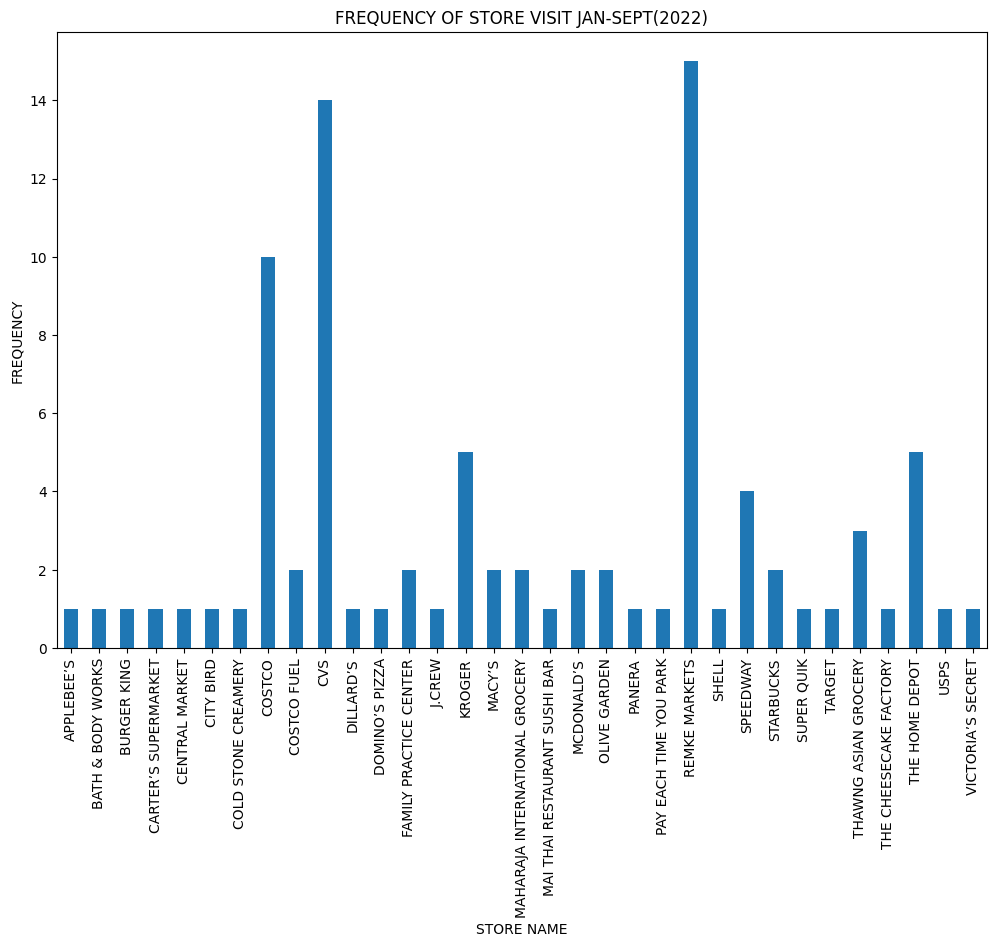

In [11]:
#Number of times particular store was visited during jan-sept 2022
total_by_store = df.groupby('STORE_NAME').count()['TOTAL_AMOUNT_SPENT($)'].plot(kind='bar', figsize=(12,8), xlabel='STORE NAME', ylabel='FREQUENCY', title='FREQUENCY OF STORE VISIT JAN-SEPT(2022)')
#print(total_by_store)

   TRANSACTION_DATE     STORE_NAME  TOTAL_AMOUNT_SPENT($)  \
0        2022-01-15  REMKE MARKETS                  30.19   
6        2022-01-31  REMKE MARKETS                  14.72   
7        2022-01-31  REMKE MARKETS                 116.74   
13       2022-03-02  REMKE MARKETS                  26.56   
14       2022-03-02  REMKE MARKETS                  19.68   
22       2022-03-18  REMKE MARKETS                  30.19   
47       2022-06-02  REMKE MARKETS                 104.07   
61       2022-07-08  REMKE MARKETS                  49.62   
67       2022-07-11  REMKE MARKETS                  74.16   
70       2022-07-29  REMKE MARKETS                  44.10   
71       2022-08-06  REMKE MARKETS                   8.46   
72       2022-08-07  REMKE MARKETS                  85.38   
73       2022-08-07  REMKE MARKETS                  29.23   
76       2022-08-18  REMKE MARKETS                  17.99   
91       2022-09-19  REMKE MARKETS                  29.23   

    FETCH_REWARDS_EARNE

<AxesSubplot: title={'center': 'TOTAL AMOUNT SPENT VS REWARDS EARNED FOR REMKE MARKETS'}, xlabel='Date', ylabel='Amount'>

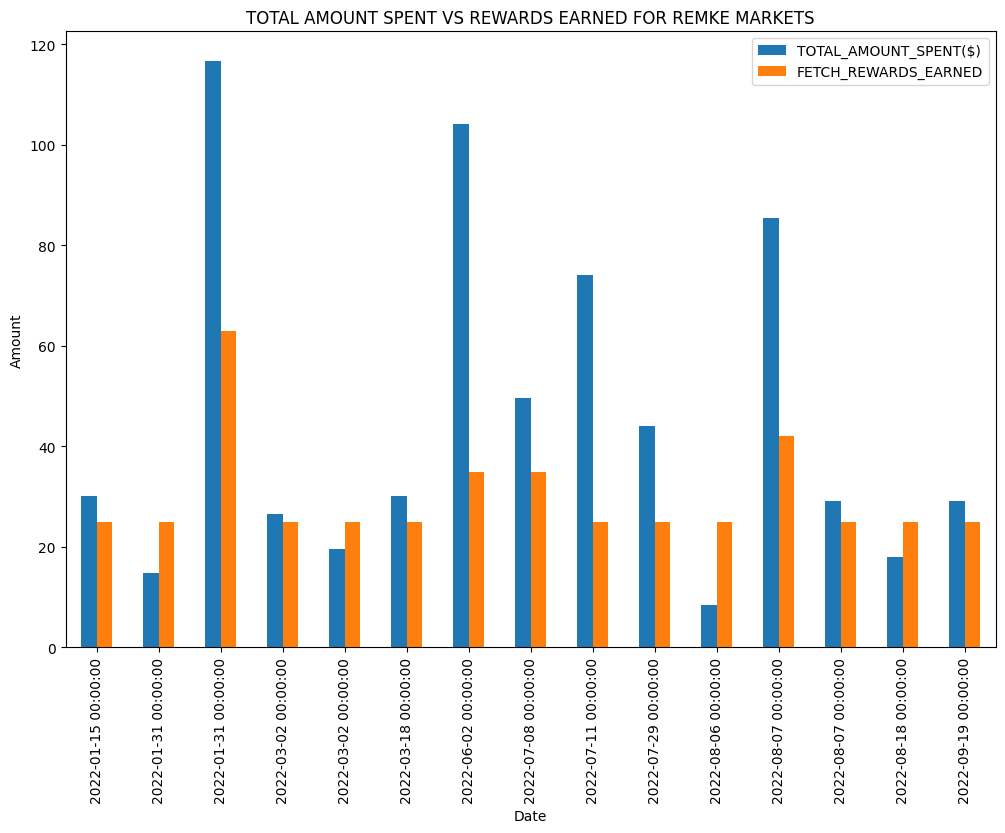

In [15]:
#getting storename, amount spent n rewards
total_spent_by_store_amount_rewards = df.loc[:,['TRANSACTION_DATE', 'STORE_NAME', 'TOTAL_AMOUNT_SPENT($)', 'FETCH_REWARDS_EARNED']] 

#info for specific store only like REMKE MARKETS
total_spent_by_specific_store = total_spent_by_store_amount_rewards.loc[total_spent_by_store_amount_rewards ['STORE_NAME'] == 'REMKE MARKETS']


#print(total_spent_by_store_amount_rewards)
print(total_spent_by_specific_store)

#
total_spent_by_specific_store.plot(x='TRANSACTION_DATE', y=['TOTAL_AMOUNT_SPENT($)', 'FETCH_REWARDS_EARNED'], kind='bar', figsize=(12, 8),
 xlabel='Date', ylabel= 'Amount', title='TOTAL AMOUNT SPENT VS REWARDS EARNED FOR REMKE MARKETS')